In [141]:
import numpy as np
import pandas as pd
import re

In [142]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [143]:
df = pd.read_csv(r'C:\Users\vasu2.SIDHU\OneDrive\Desktop\real-estate-app\datasets\clean_data\gurgaon_properties_cleaned_v1.csv')

In [144]:
df.duplicated().sum()

np.int64(122)

In [145]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,parsvnath green ville,sector 48,1.6,8376.0,1910.0,Super Built up area 1910(177.44 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),3.0,3.0,3,others,13.0,North-West,10+ Year Old,"['Sri Radhe Krishna Temple', 'Icici bank ATM', 'Standard chartered ATM', 'Best Urologist Atcomplete Family Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Neelkanth Health Care', 'Skin Clinic', 'Divine Look Clinic Centre', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Bones Clinic - Orthopaedics', 'Meher Clinic', 'Ekta Hospital', 'Sai Heart and Trauma Center', 'Sai Dharamraj Hospital', 'Samvit Health Care', 'Sanjeevani Hospital Gurgaon', 'Sona Devi Memorial Hospital and Trauma Centre', 'Sukhmani Hospital Pvt. Ltd', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Wembley estate club', 'Genius', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Kore Tech Park', 'SPAZE BUSINESS PARK', 'India Oil', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'Hdfc bank', 'Central bank of india', 'SRS Cinemas', 'SRS Cinemas', ""Domino's Pizza"", ""Nirula's"", 'Nook', 'Starbucks', 'Haldiram', 'India', 'Delhi Public School Primary Section', 'Kamla International']","['3 Wardrobe', '1 Water Purifier', '6 Fan', '1 Exhaust Fan', '3 Geyser', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"


## 1. areaWithType

Built up area- jitni jagh m hamara ghar hai (carpet area + thickness_of_walls + balcony)

Carpet area - jis zameen par ham chal sakte hain ghar ke andar

Super built up area - builtup area + extra area/common area to other houses


In [146]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
3765,1.66,1974.0,Super Built up area 1970(183.02 sq.m.)
1643,4.78,3090.0,Super Built up area 3090(287.07 sq.m.)Built Up area: 2500 sq.ft. (232.26 sq.m.)Carpet area: 2250 sq.ft. (209.03 sq.m.)
2067,0.89,1095.0,Built Up area: 1095 (101.73 sq.m.)
3379,6.50,2500.0,Plot area 2500(232.26 sq.m.)
2678,1.33,2390.0,Super Built up area 2390(222.04 sq.m.)Carpet area: 2000 sq.ft. (185.81 sq.m.)


In [147]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [148]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

    if match:

        print(match.group(0))  # the full matched string

        print(match.group(1))  # the number inside red ( ) — e.g., "111.5"

In [149]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [150]:
df['areaWithType'] = df['areaWithType'].astype(str)

In [151]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [152]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1407,1.90,flat,2727.0,Super Built up area 2727(253.35 sq.m.)Carpet area: 2300 sq.ft. (213.68 sq.m.),2727.0,NaN,2300.0
1785,0.43,flat,770.0,Carpet area: 770 (71.54 sq.m.),NaN,NaN,770.0
3418,NaN,house,NaN,Built Up area: 5000 (464.52 sq.m.),NaN,5000.0,NaN
2836,0.75,flat,1081.0,Carpet area: 1081 (100.43 sq.m.),NaN,NaN,1081.0
2946,0.25,flat,500.0,Super Built up area 500(46.45 sq.m.)Built Up area: 430 sq.ft. (39.95 sq.m.)Carpet area: 410 sq.ft. (38.09 sq.m.),500.0,430.0,410.0


In [153]:
df.duplicated().sum()

np.int64(122)

In [154]:
# kitne flats aise jisme saare area hain - inki madad se ham NaN values ko impute karenge
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [155]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1,8.25,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
5,5.50,house,1000.0,Plot area 1000(92.9 sq.m.),NaN,NaN,NaN
9,8.00,house,3600.0,Plot area 400(334.45 sq.m.),NaN,NaN,NaN
10,11.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
11,6.40,house,3150.0,Plot area 350(292.64 sq.m.)Built Up area: 349 sq.yards (291.81 sq.m.)Carpet area: 348 sq.yards (290.97 sq.m.),NaN,349.0,348.0


In [156]:
df.isnull().sum()

property_type             1
society                   2
sector                    0
price                    19
price_per_sqft           19
area                     19
areaWithType              0
bedRoom                   1
bathroom                  1
balcony                   1
additionalRoom            1
floorNum                 20
facing                 1106
agePossession             2
nearbyLocations         178
furnishDetails          982
features                636
super_built_up_area    1889
built_up_area          2617
carpet_area            1860
dtype: int64

In [157]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [158]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1,8.25,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
5,5.50,house,1000.0,Plot area 1000(92.9 sq.m.),NaN,NaN,NaN
9,8.00,house,3600.0,Plot area 400(334.45 sq.m.),NaN,NaN,NaN
10,11.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
16,4.95,house,2403.0,Plot area 267(223.25 sq.m.),NaN,NaN,NaN


Built-up area mai plot area ki value dalenge


In [159]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [160]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [161]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [162]:
all_nan_df.sample(10)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
496,10.85,house,3762.0,Plot area 418(349.5 sq.m.),NaN,418.0,NaN
3357,NaN,house,NaN,Plot area 350(292.64 sq.m.),NaN,350.0,NaN
3142,8.00,house,3600.0,Plot area 400(334.45 sq.m.),NaN,400.0,NaN
2136,2.20,house,3200.0,Plot area 3200(297.29 sq.m.),NaN,3200.0,NaN
1388,4.50,house,3150.0,Plot area 14(354.1 sq.m.),NaN,14.0,NaN
1724,3.50,house,1449.0,Plot area 161(134.62 sq.m.),NaN,161.0,NaN
1215,18.90,house,4518.0,Plot area 502(419.74 sq.m.),NaN,502.0,NaN
242,7.25,house,2592.0,Plot area 288(240.8 sq.m.),NaN,288.0,NaN
2792,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.0,NaN
921,6.80,house,5400.0,Plot area 600(501.68 sq.m.),NaN,600.0,NaN


9 x sq Yards = 1 sq feet

10.7 x sq mt = 1 sq feet

In [163]:
def convert_scale(row):
    #If the data is incomplete (e.g. one of the values is missing), no conversion is attempted.
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        # hamara area yards mai hai
        if round(row['area']/row['built_up_area']) == 9.0: 
            return row['built_up_area'] * 9
        # hamara area meters mai hai
        elif round(row['area']/row['built_up_area']) == 11.0: 
            return row['built_up_area'] * 10.7
        #already in sqft
        else:
            return row['built_up_area'] 

In [164]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [165]:
all_nan_df.sample()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
276,14.0,house,3510.0,Plot area 390(326.09 sq.m.),NaN,3510.0,NaN


In [166]:
# update the original dataframe
df.update(all_nan_df)

In [167]:
df.isnull().sum()

property_type             1
society                   2
sector                    0
price                    19
price_per_sqft           19
area                     19
areaWithType              0
bedRoom                   1
bathroom                  1
balcony                   1
additionalRoom            1
floorNum                 20
facing                 1106
agePossession             2
nearbyLocations         178
furnishDetails          982
features                636
super_built_up_area    1889
built_up_area          2071
carpet_area            1860
dtype: int64

## 2.additionalRoom

In [168]:
df['additionalRoom'].unique().shape  #there are 66 different categorical values

(66,)

In [169]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

There are 5 types of rooms:

        servant room

        pooja room 

        store room

        study room 

        others



In [170]:
df['additionalRoom'].fillna("not available", inplace=True)

C:\Users\vasu2.SIDHU\AppData\Local\Temp\ipykernel_29832\3989105996.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['additionalRoom'].fillna("not available", inplace=True)


In [171]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [172]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
508,not available,0,0,0,0,0
3055,servant room,0,1,0,0,0
1160,servant room,0,1,0,0,0
2989,"servant room,others",0,1,0,0,1
2593,not available,0,0,0,0,0


## 3.agePossession

In [173]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Aug 2023                 7
Jun 2024                 7
Dec 2025                 7
Nov 2023                 5
By 2025                  4
Aug 2024                 4
Oct 2023                 4
Sep 2023                 4
Jul 2024                 4
May 2024                 3
Jan 2025                 3
Feb 2024                 3
Nov 2024                 3
Mar 2025                 2
Sep 2025                 2
Dec 2026                 2
Apr 2026                 2
Jun 2027                 2
By 2027                  2
Jul 2027                 2
Jan 2026                 2
Jul 2025      

In [174]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1]) #if it can be converted to int, then it's a year
        return "Under Construction"
    except:
        return "Undefined"

In [175]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [105]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              334
Old Property           310
Under Construction     283
Name: count, dtype: int64

## 4.furnishDetails

In [176]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1697,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '2 Geyser', '10 Light', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1721,"['7 Fan', '1 Fridge', '1 Exhaust Fan', '6 Geyser', '1 Stove', '15 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '4 Wardrobe', '1 Washing Machine', '1 Microwave', 'No Bed', 'No Dining Table', 'No Sofa', 'No TV', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2343,"['18 Fan', '1 Fridge', '1 Exhaust Fan', '21 Geyser', '18 AC', '18 Chimney', '21 Curtains', '1 Modular Kitchen', '18 TV', '18 Wardrobe', 'No Bed', 'No Dining Table', 'No Light', 'No Microwave', 'No Sofa', 'No Stove', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Recently Renovated', 'Visitor Parking', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']"
3295,"['4 Wardrobe', '8 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
3189,"['4 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [177]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\vasu2.SIDHU\AppData\Local\Temp\ipykernel_29832\2118040236.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [178]:
furnishings_df.shape

(3804, 19)

In [179]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\vasu2.SIDHU\AppData\Local\Temp\ipykernel_29832\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [180]:
furnishings_df.sample(5)

,Geyser,Microwave,Sofa,Fridge,Dining Table,Stove,Light,Wardrobe,Water Purifier,Washing Machine,Modular Kitchen,TV,Exhaust Fan,Fan,Bed,Curtains,AC,Chimney
1901,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1661,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
727,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,0
1598,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,6,1
1031,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0


In [184]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [185]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [186]:
#elbow method to find the optimal number of clusters
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

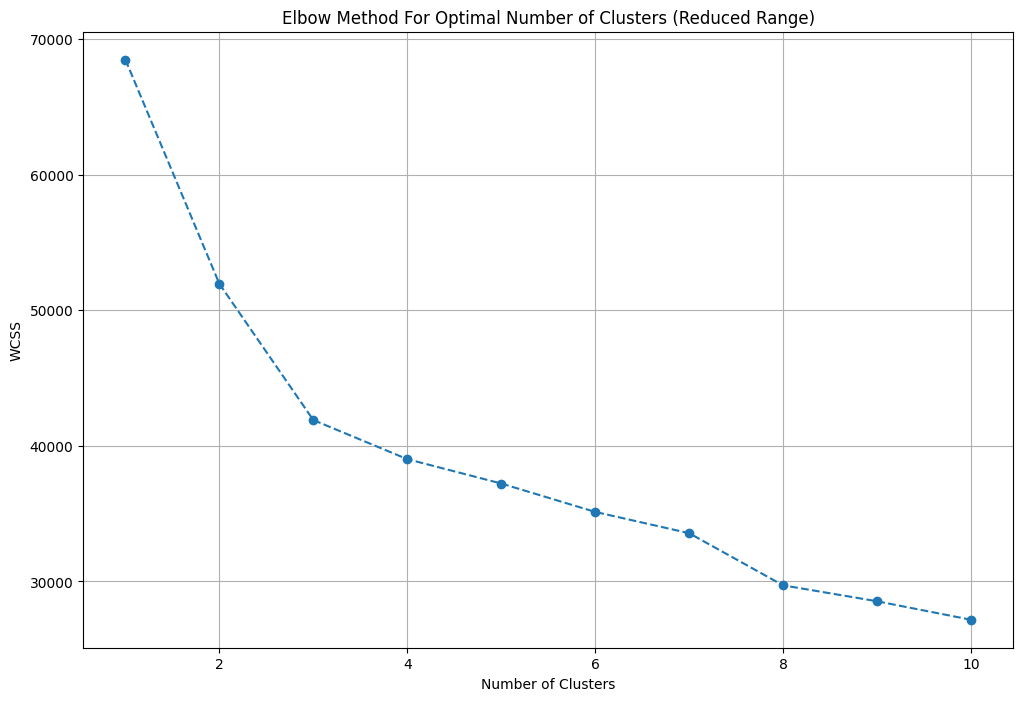

In [187]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
#from the elbow method we found that the optimal number of clusters is 3
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [ ]:
df = df.iloc[:,:-18] #the last 18 columns are dropped.

In [190]:
df['furnishing_type'] = cluster_assignments

In [191]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1577,"['1 Water Purifier', '6 Fan', '1 Fridge', '1 Exhaust Fan', '4 Geyser', '1 Stove', '10 Light', '5 AC', '1 Chimney', '1 Modular Kitchen', '5 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Curtains', 'No Dining Table', 'No Sofa', 'No TV']",1
1951,NaN,0
1853,"['1 Water Purifier', '1 Chimney', '1 Sofa', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']",0
3139,NaN,0
1642,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Geyser', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2


## 5.features

In [192]:
df[['society','features']].sample(5)

,society,features
1446,international city by sobha phase 2,"['Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']"
2874,vipul tatvam villa,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Fitness Centre / GYM', 'Club house / Community Center']"
307,m3m soulitude,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
2690,sbtl caladium,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1020,independent,NaN


In [193]:
df['features'].isnull().sum()

np.int64(636)

In [194]:
import pandas as pd
app_df = pd.read_csv(r'C:\Users\vasu2.SIDHU\OneDrive\Desktop\real-estate-app\datasets\raw_data\appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In our df in the features column, there are some Nan values, so we can try to fill these with the help of the apartments.csv file which contains society name along with the facilities(features) by matching and merging df and app_df wrt the society name


In [195]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [196]:
temp_df = df[df['features'].isnull()]

In [197]:
temp_df.shape

(636, 26)

In [198]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [199]:
x

0                                                                                                                                                                                   NaN
1                                                                   ['Valet Parking', 'Swimming Pool', 'Football', 'Laundry', 'Flower Garden', 'School', 'ATM', 'Card Room', 'Jacuzzi']
2                                                                                                                                                                                   NaN
3                           ['Swimming Pool', 'Bar/Chill-Out Lounge', 'School', 'Spa', 'Grocery Shop', 'Squash Court', 'Shopping Centre', 'Power Back up Lift', 'CCTV Camera Security']
4                                                                                                                                                                                   NaN
5                         ['Swimming Pool', 'Gazebo', 'Amphitheatre', 'Basketbal

In [200]:
df.loc[temp_df.index,'features'] = x.values

In [201]:
df['features'].isnull().sum()

np.int64(482)

In [202]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [203]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [204]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
3531,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3050,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [205]:
features_binary_df.shape

(3804, 130)

In [206]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

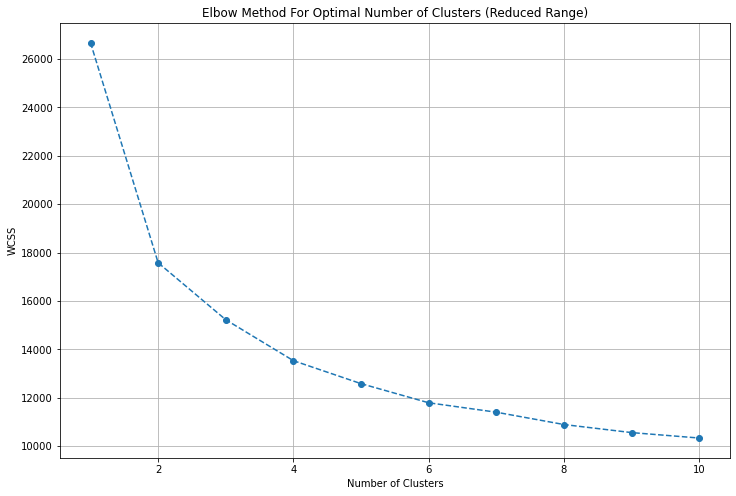

In [536]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

since from the elbow curve we can see that there are only two fesible clusters, so clustering them is a bad idea

In [207]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [208]:
df['luxury_score'] = luxury_score

In [210]:
df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,parsvnath green ville,sector 48,1.60,8376.0,1910.0,Super Built up area 1910(177.44 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.),3.0,3.0,3,others,13.0,North-West,Old Property,"['Sri Radhe Krishna Temple', 'Icici bank ATM', 'Standard chartered ATM', 'Best Urologist Atcomplete Family Clinic', 'Wellness Eye Centre', 'Dr. Aruna Kalra', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Neelkanth Health Care', 'Skin Clinic', 'Divine Look Clinic Centre', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Bones Clinic - Orthopaedics', 'Meher Clinic', 'Ekta Hospital', 'Sai Heart and Trauma Center', 'Sai Dharamraj Hospital', 'Samvit Health Care', 'Sanjeevani Hospital Gurgaon', 'Sona Devi Memorial Hospital and Trauma Centre', 'Sukhmani Hospital Pvt. Ltd', ""DR AKRAM JAWED'S THE UPPER LIMB CLINIC"", 'Wembley estate club', 'Genius', 'Apollo Pharmacy', 'Gardian Pharmacy', 'Kore Tech Park', 'SPAZE BUSINESS PARK', 'India Oil', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'Indusind bank', 'Hdfc bank', 'Central bank of india', 'SRS Cinemas', 'SRS Cinemas', ""Domino's Pizza"", ""Nirula's"", 'Nook', 'Starbucks', 'Haldiram', 'India', 'Delhi Public School Primary Section', 'Kamla International']","['3 Wardrobe', '1 Water Purifier', '6 Fan', '1 Exhaust Fan', '3 Geyser', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1910.0,1700.0,1600.0,0,0,0,0,1,2,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Visitor Parking, Swimming Pool, Park, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center]",119
1,house,independent,sector 43,8.25,30556.0,2700.0,Plot area 300(250.84 sq.m.),5.0,6.0,3+,"study room,servant room,store room,pooja room",3.0,West,Moderately Old,"['Iffco chowk metro station', 'Huda city centre metro station', 'Standard chartered ATM', 'Kotak mahindra bank ATM', 'Rbs ATM', 'Icici bank ATM', 'Axis bank ATM', 'Punjab national bank ATM', 'Max Hospital', 'Sitaram Bhartia', 'Dr. Kutbuddin Akbary', 'Umkal Hospital', 'Dr. Naval Mendiratta', 'Sidhesh Hospital Gurgaon', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Centre For Sight Gurgaon Sector 29', 'Chikitsa', 'Guardian Pharmacy', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Naveidyam', 'Pizza Hut', 'CCD', 'Drunken Monkey', 'Belgian Waffle', 'The Chicken Boat', 'Starbucks', 'Blue Tokai Coffee Roasters', 'Dighent cafe', 'Balaji Vegetarian Paradise', 'Fat', 'Nowhere Brewpub and cafe', 'Barbecue Grill', 'Roots', 'PWO house', 'MoB Ministory of Beer', 'Park Baluchi', 'Beer & Whisky Bar', 'Bikanervala', 'Gola Sizzles', 'The Oriental Bloom Chinese and Thai', 'Gravity Space Bar', 'Zura', 'Black Mambaa', 'Stones2milestones', 'Bahrisons library', 'Ncr library']","['5 Wardrobe', '10 Fan', '1 Exhaust Fan', '5 Geyser', '52 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining

In [211]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [212]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1709,flat,dlf the primus,sector 82a,2.60,11438.0,2273.0,Super Built up area 2273(211.17 sq.m.)Carpet area: 1340 sq.ft. (124.49 sq.m.),4.0,4.0,3+,2.0,East,Relatively New,2273.0,NaN,1340.0,0,0,0,0,1,0,38
2952,flat,aipl peaceful homes,sector 70a,2.75,12791.0,2150.0,Built Up area: 2150 (199.74 sq.m.),3.0,3.0,3+,14.0,North-East,Undefined,NaN,2150.0,NaN,0,0,0,0,0,0,0
1358,flat,adani m2k oyster grande,sector 102,2.50,7817.0,3198.0,Super Built up area 3198(297.1 sq.m.)Built Up area: 2600 sq.ft. (241.55 sq.m.)Carpet area: 2350 sq.ft. (218.32 sq.m.),4.0,5.0,3+,10.0,North-East,Relatively New,3198.0,2600.0,2350.0,0,1,0,1,0,2,174
711,house,independent,sector 26,20.00,44444.0,4500.0,Plot area 500(418.06 sq.m.),5.0,7.0,3+,3.0,West,Relatively New,NaN,4500.0,NaN,0,1,0,1,0,1,97
889,house,independent,sector 8,0.82,10224.0,802.0,Carpet area: 802 (74.51 sq.m.),4.0,4.0,0,2.0,NaN,Undefined,NaN,NaN,802.0,0,0,0,0,0,0,0


In [213]:
df.shape

(3804, 23)

In [214]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)